In [ ]:
df1.to_csv("/content/drive/MyDrive/campus placement/ml-with-python-course-project 2/preprocess_data.csv")

In [ ]:
df1

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_Arts,hsc_Commerce,hsc_Science,degree_Comm&Mgmt,degree_Others,degree_Sci&Tech
0,0,67.00,91.00,58.00,0,55.0,1,58.80,1,270000.0,0,1,0,0,0,1
1,0,79.33,78.33,77.48,1,86.5,0,66.28,1,200000.0,0,0,1,0,0,1
2,0,65.00,68.00,64.00,0,75.0,0,57.80,1,250000.0,1,0,0,1,0,0
3,0,56.00,52.00,52.00,0,66.0,1,59.43,0,0.0,0,0,1,0,0,1
4,0,85.80,73.60,73.30,0,96.8,0,55.50,1,425000.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,82.00,77.60,0,91.0,0,74.49,1,400000.0,0,1,0,1,0,0
211,0,58.00,60.00,72.00,0,74.0,0,53.62,1,275000.0,0,0,1,0,0,1
212,0,67.00,67.00,73.00,1,59.0,0,69.72,1,295000.0,0,1,0,1,0,0
213,1,74.00,66.00,58.00,0,70.0,1,60.23,1,204000.0,0,1,0,1,0,0


In [ ]:
x = df1.drop(['status'],axis = 1)
y = df1.status

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            215 non-null    int64  
 1   ssc_p             215 non-null    float64
 2   hsc_p             215 non-null    float64
 3   degree_p          215 non-null    float64
 4   workex            215 non-null    int64  
 5   etest_p           215 non-null    float64
 6   specialisation    215 non-null    int64  
 7   mba_p             215 non-null    float64
 8   salary            215 non-null    float64
 9   hsc_Arts          215 non-null    uint8  
 10  hsc_Commerce      215 non-null    uint8  
 11  hsc_Science       215 non-null    uint8  
 12  degree_Comm&Mgmt  215 non-null    uint8  
 13  degree_Others     215 non-null    uint8  
 14  degree_Sci&Tech   215 non-null    uint8  
dtypes: float64(6), int64(3), uint8(6)
memory usage: 16.5 KB


In [ ]:
X_train,x_test,Y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 1)

In [ ]:
print('y',y.value_counts(),sep='\n')
print()
print('y_train',Y_train.value_counts(),sep='\n')

y
1    148
0     67
Name: status, dtype: int64

y_train
1    120
0     52
Name: status, dtype: int64


Dataset is imbalanced. Problem is that models trained on imbalanced datasets often have poor results when they have to generalize.

SMOTE resampling on training set

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
pip install mlrose

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [ ]:
pip install mlrose

In [ ]:
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [ ]:
smote= SMOTE(random_state=42)
x_train,y_train = smote.fit_resample(X_train, Y_train)

In [ ]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)

In [ ]:
y_train.value_counts()

1    120
0    120
dtype: int64

In [ ]:
y_train

,0
0,1
1,1
2,1
3,1
4,1
...,...
235,0
236,0
237,0
238,0


In [ ]:
#importing metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

Logistic Regression

In [ ]:
warnings.filter = warnings.simplefilter('ignore')
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)


In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(x_test, y_test)))
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(logreg.score(x_train, y_train)))

Accuracy of logistic regression classifier on test set: 1.000
Accuracy of logistic regression classifier on train set: 1.000


Hyperparameter Tuning for Logistic Regression

In [ ]:
param_grid=[{'penalty':['l1','l2','elasticnet','none'],
             'C':np.logspace(-4,4,20),
             'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
             'max_iter':[100,200,1000,2500,5000]}]

In [ ]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(logreg,param_grid,cv=3,verbose=True,n_jobs=-1)

In [ ]:
best_clf=clf.fit(x_train,y_train)

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 1328 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 2828 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:  1.9min finished


In [ ]:
best_clf.best_estimator_

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
best_ypred=clf.predict(x_test)

In [ ]:
print('Accuracy of logistic regression classifier(GridSearchCV) on test set: {:.3f}'.format(best_clf.score(x_test, y_test)))
print('Accuracy of logistic regression classifier(GridSearchCV) on train set: {:.3f}'.format(best_clf.score(x_train, y_train)))

Accuracy of logistic regression classifier(GridSearchCV) on test set: 1.000
Accuracy of logistic regression classifier(GridSearchCV) on train set: 1.000


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test,y_pred))


Confusion Matrix:
 [[15  0]
 [ 0 28]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        28

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



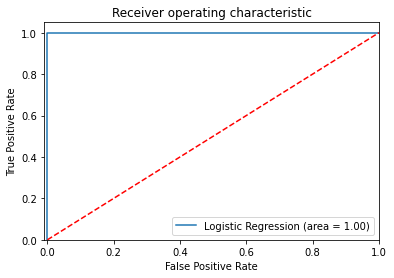

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
dt = DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)
y_pred_dt= dt.predict(x_test)


In [ ]:
print('Accuracy of Decision Tree classifier on test set: {:.3f}'.format(dt.score(x_test, y_test)))
print('Accuracy of Decision Tree classifier on train set: {:.3f}'.format(dt.score(x_train, y_train)))

Accuracy of Decision Tree classifier on test set: 1.000
Accuracy of Decision Tree classifier on train set: 1.000


In [ ]:
param_grid_dt={'criterion':['gini','entropy'],'max_depth':[2,3,4,5],'max_features':('auto','sqrt','log2'),'min_samples_split':(2,4,6)}

In [ ]:
clf_dt=GridSearchCV(dt,param_grid_dt,n_jobs=-1,verbose=True,cv=5) 

In [ ]:
clf_dt.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [ ]:
clf_dt.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
best_ypred_dt=clf_dt.predict(x_test)

In [ ]:
print('Accuracy of Decision Tree(GridSearchCV) classifier on test set: {:.3f}'.format(clf_dt.score(x_test, y_test)))
print('Accuracy of Decision Tree(GridSearchCV) classifier on train set: {:.3f}'.format(clf_dt.score(x_train, y_train)))

Accuracy of Decision Tree(GridSearchCV) classifier on test set: 0.814
Accuracy of Decision Tree(GridSearchCV) classifier on train set: 0.925


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,best_ypred_dt)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test,best_ypred_dt))

Confusion Matrix:
 [[10  5]
 [ 3 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.67      0.71        15
           1       0.83      0.89      0.86        28

    accuracy                           0.81        43
   macro avg       0.80      0.78      0.79        43
weighted avg       0.81      0.81      0.81        43



In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)


In [ ]:
print('Accuracy of Random Forest classifier on test set: {:.3f}'.format(rf.score(x_test, y_test)))
print('Accuracy of Random Forest classifier on train set: {:.3f}'.format(rf.score(x_train, y_train)))

Accuracy of Random Forest classifier on test set: 1.000
Accuracy of Random Forest classifier on train set: 1.000


In [ ]:
# Number of trees in random forest
n_estimators =[20,60,100,120]
# Number of features to consider at every split
max_features = [0.2,0.6,1.0]
# Maximum number of levels in tree
max_depth = [2,4,8,None]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion=['gini','entropy']

In [ ]:
param_grid_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,'criterion':criterion}

In [ ]:
clf_rf = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv = 5, verbose=2, n_jobs = -1)

In [ ]:
clf_rf.fit(x_train, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 718 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1284 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2014 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2904 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed:  5.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [ ]:
clf_rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features=0.2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
best_ypred_rf=clf_rf.predict(x_test)

In [ ]:
print('Accuracy of Random Forest(GridSearchCV) classifier on test set: {:.3f}'.format(clf_rf.score(x_test, y_test)))
print('Accuracy of Random Forest(GridSearchCV) classifier on train set: {:.3f}'.format(clf_rf.score(x_train, y_train)))

Accuracy of Random Forest(GridSearchCV) classifier on test set: 0.977
Accuracy of Random Forest(GridSearchCV) classifier on train set: 0.983


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,best_ypred_rf)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test,best_ypred_rf))

Confusion Matrix:
 [[15  0]
 [ 1 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.96      0.98        28

    accuracy                           0.98        43
   macro avg       0.97      0.98      0.97        43
weighted avg       0.98      0.98      0.98        43



In [ ]:
from sklearn.naive_bayes import BernoulliNB 
nb = BernoulliNB() 
nb.fit(x_train, y_train) 
  
#Applying and predicting 
y_pred_nb = nb.predict(x_test) 

print('Accuracy of Naive Bayes classifier on test set: {:.3f}'.format(nb.score(x_test, y_test)))
print('Accuracy of Naive Bayes classifier on train set: {:.3f}'.format(nb.score(x_train, y_train)))

Accuracy of Naive Bayes classifier on test set: 1.000
Accuracy of Naive Bayes classifier on train set: 1.000


Hyperparameter Tuning for Naive Bayes

In [ ]:
para_gird_nb={'alpha':[0.01,0.1,0.5,1,10]}

In [ ]:
clf_nb=GridSearchCV(nb,para_gird_nb,n_jobs=-1,cv=5,verbose=5)

In [ ]:
clf_nb.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                                   fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [ ]:
clf_nb.best_estimator_

BernoulliNB(alpha=0.01, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
best_ypred_nb=clf_nb.predict(x_test)

In [ ]:
print('Accuracy of Naive Bayes classifier on test set(GridSearchCV): {:.3f}'.format(clf_nb.score(x_test, y_test)))
print('Accuracy of Naive Bayes classifier on train set(GridSearchCV): {:.3f}'.format(clf_nb.score(x_train, y_train)))

Accuracy of Naive Bayes classifier on test set(GridSearchCV): 1.000
Accuracy of Naive Bayes classifier on train set(GridSearchCV): 1.000


Confusion matrix and Classification report

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred_nb))

Confusion Matrix:
 [[15  0]
 [ 0 28]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        28

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



SVM

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',probability=True)
svclassifier.fit(x_train, y_train)
y_pred_svm = svclassifier.predict(x_test)



In [ ]:
print('Accuracy of SVM  on test set: {:.3f}'.format(svclassifier.score(x_test, y_test)))
print('Accuracy of SVM  on train set: {:.3f}'.format(svclassifier.score(x_train, y_train)))


Accuracy of SVM  on test set: 1.000
Accuracy of SVM  on train set: 1.000


In [ ]:
confusion_matrix = confusion_matrix(y_test,y_pred_svm)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test,y_pred_svm))

Confusion Matrix:
 [[15  0]
 [ 0 28]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        28

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



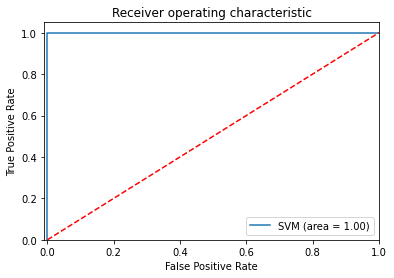

In [ ]:
svm_roc_auc = roc_auc_score(y_test, svclassifier.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, svclassifier.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/campus placement/model_pickle','wb') as f:
  pickle.dump(clf,f)

In [ ]:
with open('/content/drive/MyDrive/campus placement/model_pickle','rb') as f:
  map = pickle.load(f)

In [ ]:
map

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63...
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 200, 1000, 2500, 5000],
         

In [ ]:
map.predict(x_test.values)

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [ ]:
from prettytable import PrettyTable


x = PrettyTable()
x.field_names =  ['MODEL','TRAIN_ACCURACY','TEST_ACCURACY']

x.add_row(["Log Reg ", 'Log reg train = 0.896','Log reg test = 0.907'])

x.add_row(["Hyperparameter Tuning Log Reg ", 'Log reg(GridSearchCV)train = 0.908','Log reg(GridSearchCV) test = 0.907'])

x.add_row(["DT", 'DT train = 1.000','DT test = 0.791'])

x.add_row(["Hyperparam Tuning for DT", 'DT(GridSearchCV) train = 0.908','DT(GridSearchCV)test = 0.721'])

x.add_row(["RF", 'RF train = 1.000','RF test = 0.884'])

x.add_row(["Hyperparam Tuning for RF", 'RF(GridSearchCV) train = 1.000','RF(GridSearchCV) test = 0.814'])

x.add_row(["NB BernoulliNB", 'NB train = 0.762','NB test = 0.698'])

x.add_row(["Hyperparameter Tuning for NB", 'NB train (GridSearchCV)= 0.758','NB test set(GridSearchCV): 0.698'])

x.add_row(["SVM", 'Accuracy = SVM train = 0.912','Accuracy = SVM test = 0.907'])












print('\n')
print(x)



+--------------------------------+------------------------------------+------------------------------------+
|             MODEL              |           TRAIN_ACCURACY           |           TEST_ACCURACY            |
+--------------------------------+------------------------------------+------------------------------------+
|            Log Reg             |       Log reg train = 0.896        |        Log reg test = 0.907        |
| Hyperparameter Tuning Log Reg  | Log reg(GridSearchCV)train = 0.908 | Log reg(GridSearchCV) test = 0.907 |
|               DT               |          DT train = 1.000          |          DT test = 0.791           |
|    Hyperparam Tuning for DT    |   DT(GridSearchCV) train = 0.908   |    DT(GridSearchCV)test = 0.721    |
|               RF               |          RF train = 1.000          |          RF test = 0.884           |
|    Hyperparam Tuning for RF    |   RF(GridSearchCV) train = 1.000   |   RF(GridSearchCV) test = 0.814    |
|         NB Bern

In [ ]:
df

In [ ]:
!python --version

In [ ]:
pip freeze>"/content/drive/MyDrive/campus placement/requirements.txt"

Conclusion Comparing all the applied models, it is evident the Logistic Regression with GridSearchCV is performing the best with a precision and accuracy score of 90.8 and 90.7 respectively. 